<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_CNN_B_augmentation_jul_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing import image

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 7.4MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 202.49 MiB | 28.02 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     197  207.617859  213.103302  ...    0.297276    1.584375    0.762658
1     103  252.052216  252.980850  ...  200.482315  192.536041  182.760193
2     128  153.305664  168.249023  ...  125.667969  122.086914  120.923828
3     131   92.519493   91.574554  ...  161.328949  150.257202  135.541397
4     123  133.072189  125.464813  ...  129.923737  110.246613  134.161880
5     130  149.885910  134.547226  ...  137.793854  129.984619  129.809464
6     168  141.583328  141.305557  ...  105.777779  111.194443  117.750000
7     140  189.479996  169.599991  ...  145.000000  143.679993  145.800003
8     183  185.236069  168.600830  ...   70.325333   59.045029   19.702320
9     150  153.931381  125.737602  ...    1.000000    1.000000    1.000000
10    185   93.817291   88.901764  ...    1.298583    0.137706    1.325610
11    137  141.275986  130.605194  ...  232.833557  227.453613  229.094315
12    128  179.391602  16

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.84 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 46s 17ms/step - loss: 0.7511 - accuracy: 0.6436
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.5068 - accuracy: 0.7590
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8200
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9298
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1320 - accuracy: 0.9601
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.9650
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0610 - accuracy: 0.9794
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9967
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9918
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0880 - accuracy: 0.9614
Epoch 1

In [17]:

# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 5
data_generator = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

model.fit(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=200)

Epoch 1/200
68/68 [==============================] - 2s 17ms/step - loss: 0.8227 - accuracy: 0.5533 - val_loss: 0.6936 - val_accuracy: 0.4898
Epoch 2/200
68/68 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.4898
Epoch 3/200
68/68 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5059 - val_loss: 0.6938 - val_accuracy: 0.4898
Epoch 4/200
68/68 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5030 - val_loss: 0.6935 - val_accuracy: 0.4898
Epoch 5/200
68/68 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4675 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 6/200
68/68 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5148 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 7/200
68/68 [==============================] - 0s 5ms/step - loss: 0.6168 - accuracy: 0.7160 - val_loss: 9.3577 - val_accuracy: 0.5102
Epoch 8/200


In [18]:
# X_train.shape
steps_per_epoch

68

In [19]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9971
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9971
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11/

In [20]:
Y_test = yback(Y_test)

In [21]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        70   2
1         2  73


In [22]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
5   172.0  101.557068   98.128723  ...    0.502975    2.043808    0.118442
10  198.0   72.640129   75.233948  ...    0.902867    0.000000    0.000000
14  132.0   99.912766   99.797989  ...  136.005508  142.307632  140.765854
23  165.0   96.162613  122.159096  ...   54.862110   48.515007   37.005508
26  188.0   63.377541   61.138977  ...   63.220913   66.860565   72.512451
27  124.0   53.867844   38.016644  ...   12.810613    3.649323    2.382934
28  191.0  124.580231   99.179665  ...   99.584961  112.032646  108.363564
32  128.0   95.728516   98.484375  ...   22.014648   26.892578   32.234375
34  113.0   61.291481   60.417965  ...   70.870468   68.101105   63.274414
40  109.0   97.648178   99.220428  ...   89.935783   91.213615   89.774513
44  200.0  110.669609  108.840805  ...   57.342003   62.326004   57.558006
45  150.0   75.288887   83.270393  ...   41.807293   66.117332   84.013153
48  154.0   99.289261  10

In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (353/353), done.
remote: Compressing objects: 100% (352/352), done.
remote: Total 592 (delta 215), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (592/592), 5.09 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (352/352), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.23 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [27]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [28]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
5,172.0,101.557068,98.128723,101.747978,107.835602,115.239601,129.891296,143.020569,133.254211,31.388319,29.560844,29.686317,47.357491,98.188217,134.784210,132.199036,118.964844,108.418610,106.641441,103.562469,97.923744,102.407257,103.601944,105.022186,114.480263,124.139008,115.123848,26.545704,19.326122,97.285019,98.623032,103.339645,108.153069,114.670647,123.277458,134.581406,122.151436,29.331532,31.099516,70.305573,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725257,2.277988,0.722012,0.000541,0.019470,0.019470,0.009735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.502975,2.043808,0.118442
10,198.0,72.640129,75.233948,72.447395,67.467705,69.026115,72.809608,73.448013,73.057640,75.735130,77.437401,78.845718,76.451477,72.934692,73.592583,72.875931,74.201912,74.254555,75.561775,74.992645,79.474434,77.371895,65.220085,45.122330,34.849911,34.279766,35.749615,27.364861,17.316906,68.165283,68.440147,66.656967,62.060093,60.395565,62.779606,63.176201,65.234970,67.916542,71.989174,73.636658,...,62.274460,63.938572,63.205181,60.147739,56.609631,52.195793,51.117435,44.720535,23.095703,3.115498,0.052240,0.000000,65.724609,65.919693,64.303940,62.969994,63.528202,54.787872,44.970406,35.255478,36.441788,39.483311,47.880722,59.015095,64.890106,67.982651,66.435455,60.475456,59.160488,59.560249,58.247520,55.958164,54.721050,51.715633,50.210587,40.451176,11.934597,0.902867,0.000000,0.000000
14,132.0,99.912766,99.797989,100.451797,100.994492,100.347115,100.647392,101.647392,96.535362,88.325073,85.586784,85.370071,85.859512,89.146011,94.407715,101.170807,102.494957,102.423332,108.142334,118.017448,120.629028,112.847572,101.179985,97.884308,97.184570,96.930222,94.718094,93.443535,91.565659,95.144173,98.837471,100.873276,99.912773,99.112038,103.507812,102.374657,96.018372,88.084496,87.130394,88.266304,...,60.625343,60.050507,57.190083,57.614323,79.516075,105.895325,116.855835,122.889824,128.810852,136.778702,140.403137,136.890732,48.263542,65.259872,74.134987,75.704315,71.694221,68.882462,64.726357,65.693298,64.406799,63.956848,63.575764,60.968781,60.447201,60.820023,60.112030,59.411392,58.667587,55.205696,54.824615,84.233246,107.350784,115.174477,119.729111,122.254372,124.577606,136.005508,142.307632,140.765854
23,165.0,96.162613,122.159096,104.441803,80.908722,75.215210,73.983910,77.536972,74.520706,73.810471,74.590851,67.162758,58.590267,40.729515,31.236183,28.356730,25.483418,23.301746,22.571829,23.049955,20.024281,16.043526,15.264536,13.073608,8.908173,4.645546,3.435335,2.765179,1.732966,91.609596,116.088936,95.835297,80.947510,73.386154,74.141273,71.512367,70.920326,70.490585,67.746857,66.505569,...,66.131905,65.387810,61.957397,62.608707,61.170948,58.741482,58.896271,60.181046,57.885582,50.330544,30.378881,14.581416,46.333191,44.344135,44.817226,43.328594,42.659325,46.244263,47.307991,50.649185,53.093586,53.073608,53.428757,56.542145,59.796989,59.758644,60.710449,62.767899,64.839645,65.972198,61.798054,61.364040,59.450836,60.052711,59.311554,59.909603,58.802979,54.862110,48.515007,37.005508
26,188.0,63.377541,61.138977,54.995930,55.511997,56.181526,58.811676,60.364872,62.856949,67.607513,76.126747,87.439102,96.983246,100.165230,102.084648,102.209152,99.465813,98.174278,101.521500,104.813034,99.619736,93.987328,91.268440,89.120407,87.675407,84.735168,78.175186,77.901764,76.271614,64.451790,61.996826,54.884563,55.419197,57.492531,58.986874,59.654140,62.015842,66.053413,67.291077,71.432770,...,79.081932,84.594376,94.827980,110.645538,132.808960,125.062469,111.710274,97.973289,80.211853,6

In [29]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

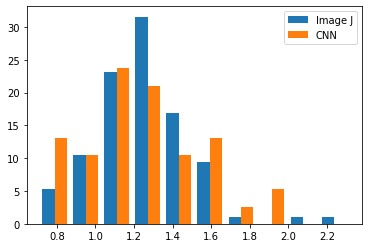

In [30]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

<a list of 2 Lists of Patches objects>
[0.70783943 0.86879941 1.02975939 1.19071936 1.35167934 1.51263931
 1.67359929 1.83455926 1.99551924 2.15647921 2.31743919]
[[ 5.26315789 10.52631579 23.15789474 31.57894737 16.84210526  9.47368421
   1.05263158  0.          1.05263158  1.05263158]
 [13.15789474 10.52631579 23.68421053 21.05263158 10.52631579 13.15789474
   2.63157895  5.26315789  0.          0.        ]]


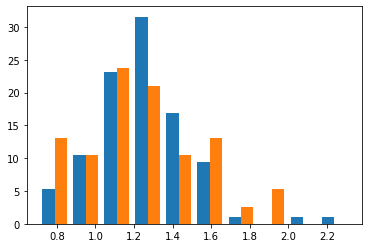

In [31]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [32]:
print(counts.sum())

200.00000000000014


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


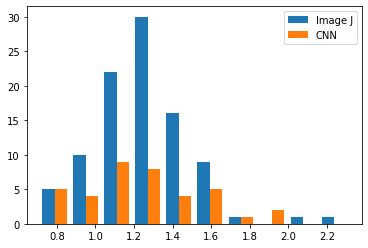

In [33]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [34]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1